In [1]:
#Import required libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('white') #command from Seaborn to set the background style of your plots to a white background.


In [2]:
plt.rcParams['font.size']=14
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize']= (12, 5)

In [6]:
#Get the data 
column_names = ['userId','movieId', 'rating', 'timestamp'] 
df = pd.read_csv('ratings.csv') 


  
#Check the head of the data 
df.head() 

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [7]:
df.shape

(105339, 4)

In [8]:
df.nunique()

userId         668
movieId      10325
rating          10
timestamp    84686
dtype: int64

In [9]:
668*10325

6897100

In [10]:
#Check out all the movies and their respective IDs 
movie_titles = pd.read_csv('movies.csv') 
movie_titles.head() 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
#Merging both the datasets
data = pd.merge(df, movie_titles, on='movieId') 
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [14]:
#Calculate mean rating of all movies 
data.groupby('genres')['rating'].mean().sort_values(ascending=False).head() 

genres
Comedy|Crime|Drama|Fantasy                        5.0
Action|Adventure|Comedy|Crime|Romance|Thriller    5.0
Crime|Mystery|War                                 5.0
Animation|Fantasy|Sci-Fi|Thriller                 5.0
Action|Comedy|Drama|Romance                       5.0
Name: rating, dtype: float64

In [15]:
#Calculate count rating of all movies 
data.groupby('genres')['rating'].count().sort_values(ascending=False).head() 

genres
Drama             7678
Comedy            6676
Comedy|Romance    3733
Drama|Romance     3407
Comedy|Drama      3101
Name: rating, dtype: int64

In [16]:
#Creating dataframe with 'rating' count values 
ratings = pd.DataFrame(data.groupby('genres')['rating'].mean())  
ratings['num of ratings'] = pd.DataFrame(data.groupby('genres')['rating'].count())   
ratings.head() 

,rating,num of ratings
genres,,
(no genres listed),3.071429,7
Action,2.836406,217
Action|Adventure,3.739804,613
Action|Adventure|Animation,4.125000,12
Action|Adventure|Animation|Children,3.550000,10


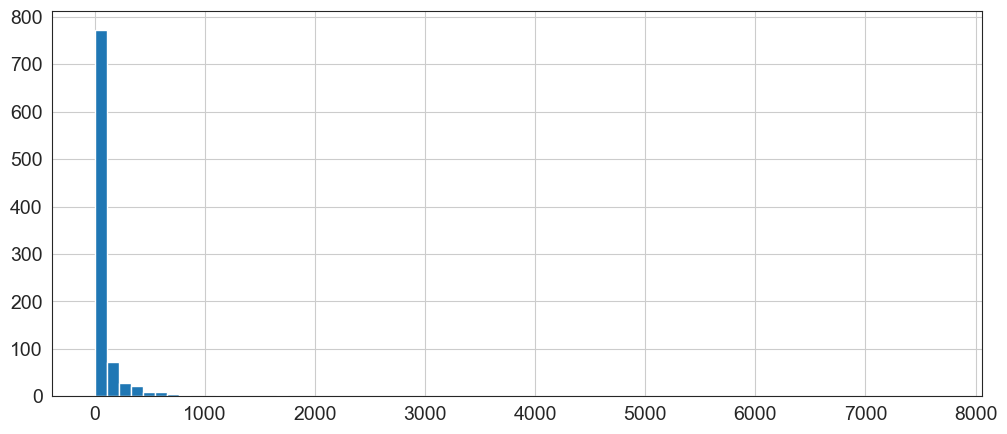

In [17]:
#Plot graph of 'num of ratings column' 
ratings['num of ratings'].hist(bins = 70) 
plt.show()

In [19]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [80]:
#To print Output data in one line 
pd.set_option('expand_frame_repr', False)
#To print data frame
df = pd.DataFrame(data)
print(df)

        userId  movieId  rating   timestamp                        title              genres
0            1       16     4.0  1217897793                Casino (1995)         Crime|Drama
1            9       16     4.0   842686699                Casino (1995)         Crime|Drama
2           12       16     1.5  1144396284                Casino (1995)         Crime|Drama
3           24       16     4.0   963468757                Casino (1995)         Crime|Drama
4           29       16     3.0   836820223                Casino (1995)         Crime|Drama
...        ...      ...     ...         ...                          ...                 ...
105334     668   140098     2.5  1450415424                Runoff (2015)               Drama
105335     668   140816     2.5  1443288791             Tangerine (2015)        Comedy|Drama
105336     668   141472     2.5  1442679119  The 50 Year Argument (2014)  (no genres listed)
105337     668   142488     4.0  1451535844             Spotlight (201

In [78]:
#First Scenario:

def recommend_movies(genre, min_reviews, num_recommendations):
    # Filter movies based on genre and minimum number of reviews
    filtered_movies = df[(df['genres'] == genre) & (df['timestamp'] >= min_reviews)]
    
    # Sort movies by rating in descending order
    sorted_movies = filtered_movies.sort_values(by='rating', ascending=False)
    
    # Select top N movies
    top_movies = sorted_movies.head(num_recommendations)
    
    # Create a DataFrame for the output
    recommended_movies = pd.DataFrame({
        'S.No': range(1, num_recommendations + 1),
        'Movie Title': top_movies['title'].values
    })
    
    return recommended_movies


In [79]:
# Example usage
genre = 'Comedy'
min_review = 100
num_recommendations = 3
recommended_movies = recommend_movies(genre, min_review, num_recommendations)
print(recommended_movies)

   S.No                            Movie Title
0     1  Ace Ventura: When Nature Calls (1995)
1     2        Ferris Bueller's Day Off (1986)
2     3              Johnny Dangerously (1984)


In [82]:
#Second Scenario :
def recommend_similar_movies(movie_title, num_recommendations):
    # Get the genre of the given movie
    movie_genre = df[df['title'] == movie_title]['genres'].values[0]
    
    # Find movies with the same genre
    similar_movies = df[df['genres'] == movie_genre]
    
    # Sort movies by rating in descending order
    sorted_movies = similar_movies.sort_values(by='rating', ascending=False)
    
    # Exclude the given movie from the recommendations
    sorted_movies = sorted_movies[sorted_movies['title'] != movie_title]
    
    # Select top N movies
    #top_movies = sorted_movies.head(num_recommendations)
    top_movies = sorted_movies.drop_duplicates(subset='title').head(num_recommendations)

      # Create a DataFrame for the output
    recommended_movies = pd.DataFrame({
        'S.No': range(1, num_recommendations + 1),
        'Movie Title': top_movies['title'].values
            })


    return recommended_movies




In [83]:
# Example usage
movie_title = 'Toy Story (1995)'
num_recommendations = 3
recommended_movies = recommend_similar_movies(movie_title, num_recommendations)
print(recommended_movies)

   S.No                       Movie Title
0     1                Toy Story 2 (1999)
1     2  Emperor's New Groove, The (2000)
2     3             Monsters, Inc. (2001)


In [74]:
#Scenario Three:
from sklearn.metrics.pairwise import cosine_similarity

# Create user-item matrix
user_item_matrix = df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Convert similarity matrix to DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

def recommend_movies(target_user, num_similar_users, num_recommendations):
    # Find K similar users
    similar_users = user_similarity_df[target_user].sort_values(ascending=False).index[1:num_similar_users+1]
    
    # Aggregate ratings of similar users
    similar_users_ratings = user_item_matrix.loc[similar_users].mean(axis=0)
    
    # Filter out movies already rated by the target user
    target_user_ratings = user_item_matrix.loc[target_user]
    unrated_movies = similar_users_ratings[target_user_ratings == 0]
    
    # Recommend top N movies
    top_movies = unrated_movies.sort_values(ascending=False).head(num_recommendations)
    
    # Get movie titles for the recommended movies
    top_movie_titles = df[df['movieId'].isin(top_movies.index)][['movieId', 'title']].drop_duplicates().set_index('movieId').loc[top_movies.index]
    
    # Create a DataFrame for the output
    recommended_movies = pd.DataFrame({
        'S.No': range(1, num_recommendations + 1),
        'Movie Title': top_movie_titles['title'].values
    })
    
    return recommended_movies


In [75]:
# Example usage
target_user = 1
num_similar_users = 100
num_recommendations = 5

recommended_movies = recommend_movies(target_user, num_similar_users, num_recommendations)
print(recommended_movies)

   S.No                                Movie Title
0     1  Indiana Jones and the Last Crusade (1989)
1     2                           Toy Story (1995)
2     3                            Die Hard (1988)
3     4                              Aliens (1986)
4     5                             Memento (2000)
